# Analysis of weather trends in Rochester

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing CSV files using pandas

In [2]:
city_data = pd.read_csv("city_data.csv")
print(city_data.head())


   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
3  1852  Abidjan  Côte D'Ivoire       NaN
4  1853  Abidjan  Côte D'Ivoire       NaN


In [3]:
global_data = pd.read_csv("global_data.csv")
print(global_data.head())

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


In [4]:
city_list = pd.read_csv("city_list.csv")
print(city_list.head())

        city               country
0    Abidjan         Côte D'Ivoire
1  Abu Dhabi  United Arab Emirates
2      Abuja               Nigeria
3      Accra                 Ghana
4      Adana                Turkey


Number of unique cities

In [5]:
nunique_cities = city_list.city.nunique()
print(nunique_cities)

332


Check if New York exists in the list

In [6]:
newyorkExists = city_list[city_list.city == "New York"]
print(newyorkExists)

         city        country
225  New York  United States


Creating a data frame containing weather data for New York

In [23]:
nyWeather = city_data.loc[(city_data.city == "New York")&(city_data.avg_temp.notnull())]
print(len(nyWeather))

266


In [24]:
nyWeather = nyWeather.sort_values('year')




In [25]:
print(nyWeather.head())

       year      city        country  avg_temp
46341  1743  New York  United States      3.26
46342  1744  New York  United States     11.66
46343  1745  New York  United States      1.13
46348  1750  New York  United States     10.07
46349  1751  New York  United States     10.79


In [26]:
nyWeather['moving_average'] = nyWeather.avg_temp.rolling(7).mean()

In [27]:
print(nyWeather.head())

       year      city        country  avg_temp  moving_average
46341  1743  New York  United States      3.26             NaN
46342  1744  New York  United States     11.66             NaN
46343  1745  New York  United States      1.13             NaN
46348  1750  New York  United States     10.07             NaN
46349  1751  New York  United States     10.79             NaN


In [28]:
clean_global_data = global_data.loc[global_data.avg_temp.notnull()]
clean_global_data['moving_average'] = clean_global_data.avg_temp.rolling(7).mean()
print(clean_global_data.head())

   year  avg_temp  moving_average
0  1750      8.72             NaN
1  1751      7.98             NaN
2  1752      5.78             NaN
3  1753      8.39             NaN
4  1754      8.47             NaN


## Line graph of Global temp vs NewYork temp


/Users/command/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


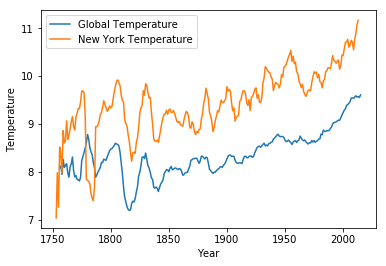

In [29]:
plt.figure()
plt.plot(clean_global_data['year'], clean_global_data['moving_average'], label="Global Temperature")
plt.plot(nyWeather['year'], nyWeather['moving_average'], label="New York Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
ax = plt.subplot()
#ax.set_xticks(range(1,7))e
#ax.set_xticklabels(clean_global_data['year'])
plt.savefig("global_vs_ny")
plt.show()


In [30]:
cc = clean_global_data['year'].corr(clean_global_data['moving_average'])
print(cc)

0.7310703144258599
